In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../data/df_final_stationery.csv')
df.shape

(401, 179)

In [4]:
df.head(2)

,cluster,kreis,ags5,ags2,supermarkets_population,supermarkets_average_distance,public_transport_availability,average_distance_bus_stop,average_distance_train_station,average_distance_public_transport,...,room_type_location,district_settlement_structure,type_of_settlement_structure,urban_/_rural,metropolitan_region,metropolitan_area,east_west,border_proximity,support_area_status,eligible_area
0,0,"Flensburg, Stadt",1001,1,92,500,35,240,2901,240,...,2,4,3,2,99,99,1,1,C,1
1,2,"Kiel, Landeshauptstadt",1002,1,92,460,37,268,2037,265,...,2,1,2,1,99,99,1,0,C/D,1


In [9]:
list(df.columns)

['cluster',
 'kreis',
 'ags5',
 'ags2',
 'supermarkets_population',
 'supermarkets_average_distance',
 'public_transport_availability',
 'average_distance_bus_stop',
 'average_distance_train_station',
 'average_distance_public_transport',
 'Unnamed:_0',
 'number_of_students',
 'number_of_hospitals',
 'number_of_hospital_beds',
 'number_of_hospital_beds_adj',
 'hospital_patiants',
 'households_of_1_person',
 'households_of_2_person',
 'households_of_3_person',
 'households_of_4_person',
 'households_of_5_person_or_more',
 'household_with_kids',
 'household_with_kids_under_3',
 'household_with_kids_over_3_under_6',
 'household_with_kids_over_6_under_10',
 'household_with_kids_over_10_under_15',
 'household_with_kids_over_15_under_18',
 'household_with_double_income_no_kids',
 'car_density',
 'no_of_paths_per_person_and_day',
 'kilometers_per_person_and_day',
 '_percentage_out_of_home',
 'share_of_journeys_on_foot',
 'share_of_journeys_on_bike',
 'proportion_of_motorised_vehicle_passenger

### bar plots

In [96]:
def plot_bar(df, x_col, y_col):
    # format
    labels = df[x_col].unique()
    x_size = len(labels)
    # plot all kreis
    if x_size>20:
        fig, ax = plt.subplots(figsize=(50,20))
        ax.bar(df[x_col], df[y_col])
        plt.xticks(rotation=60)
    # group by
    else:
        fig, ax = plt.subplots(figsize=(15,10))
        ax.bar(list(range(x_size)), df.groupby(by=[x_col])[y_col].mean(),
              yerr=df.groupby(by=[x_col])[y_col].std())
        ax.set_xticks(range(x_size))
        ax.set_xticklabels(labels)
    ax.set_title(f'{y_col} in Germany by {x_col}', fontsize=15)
    plt.show()

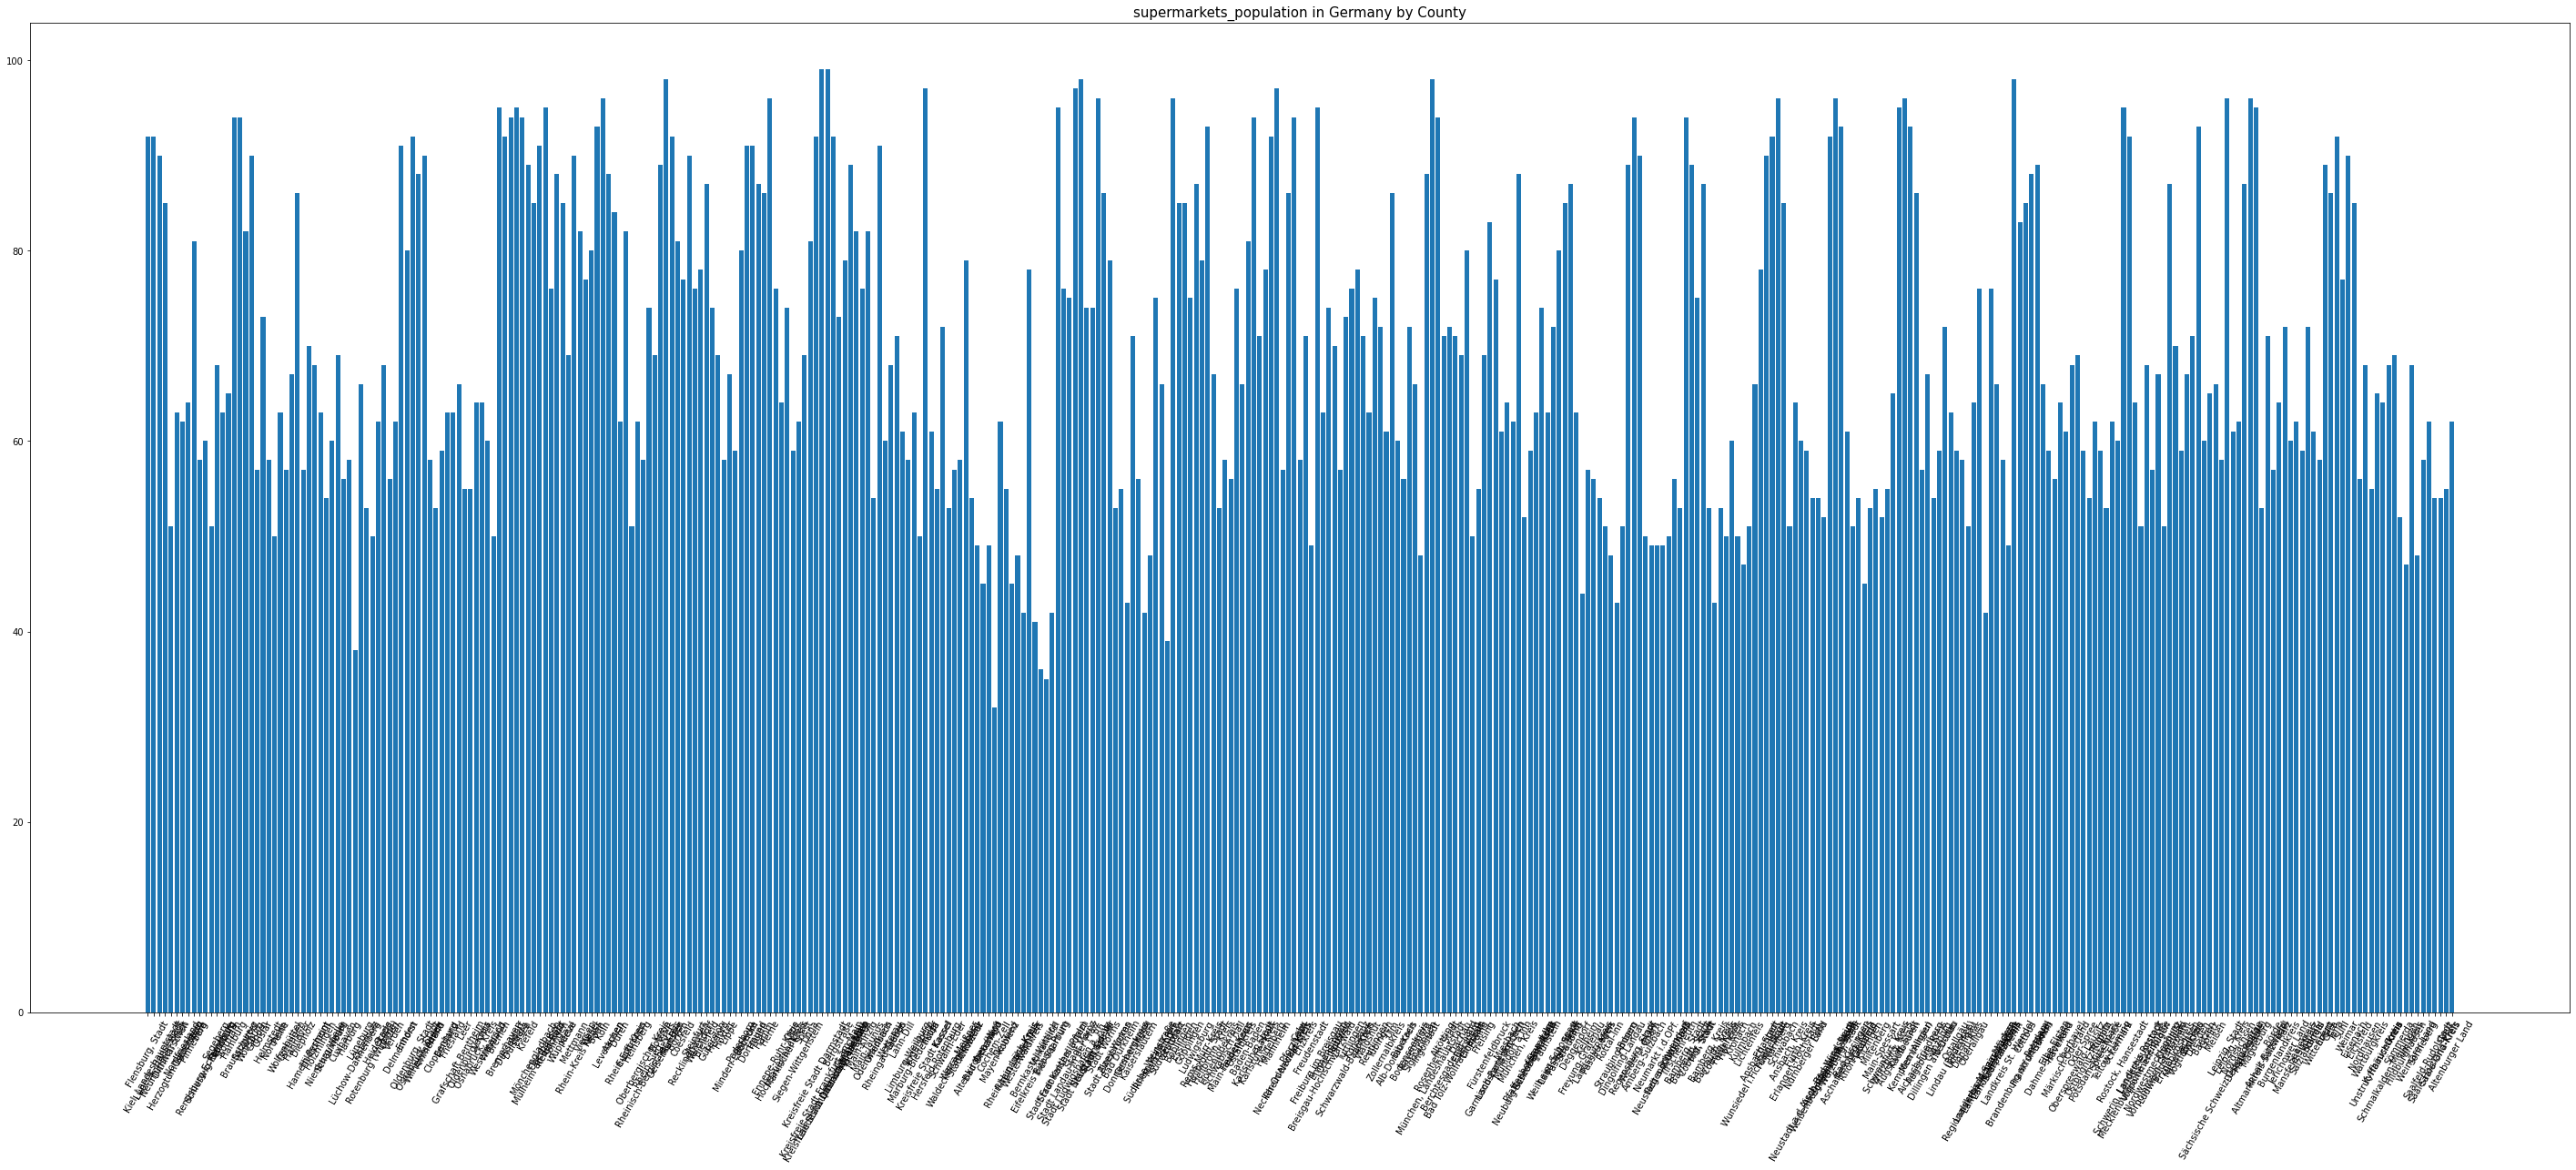

In [41]:
plot_bar(df, 'kreis', 'supermarkets_population')

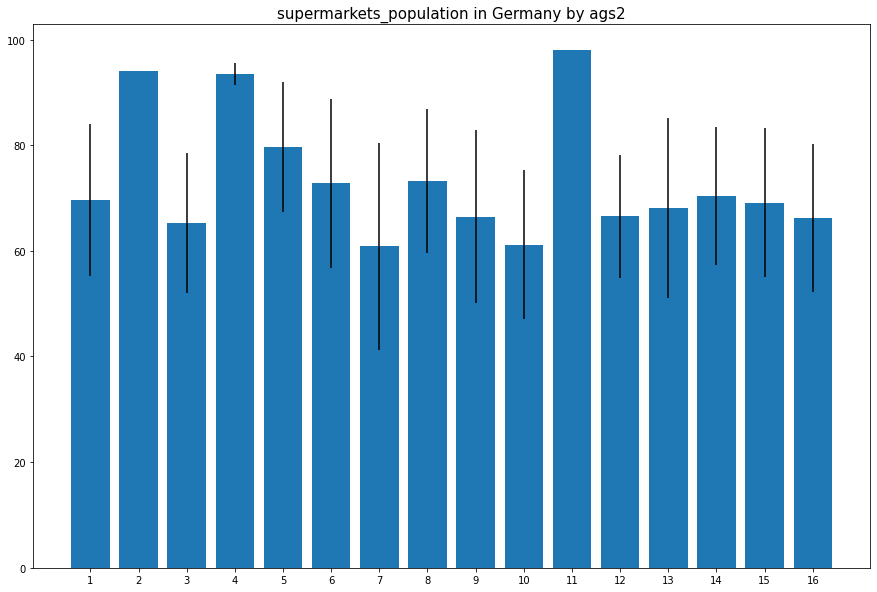

In [97]:
plot_bar(df, 'ags2', 'supermarkets_population')

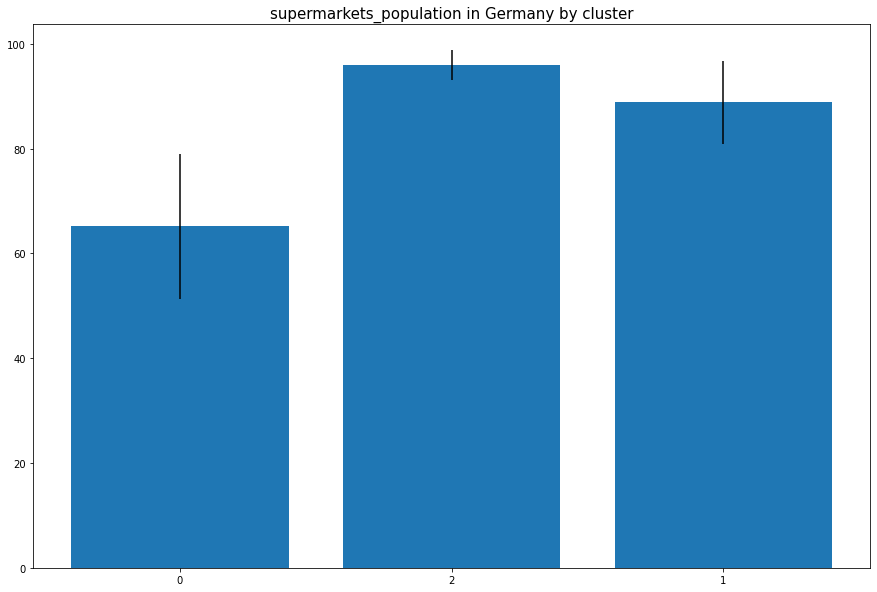

In [98]:
plot_bar(df, 'cluster', 'supermarkets_population')

### histogram

In [137]:
def plot_histogram(df, col, n_bins, filter_col=None, filter_val=None, mini=None, maxi=None):
    # default values
    if mini is None:
        mini = min(df[col])
    if maxi is None:
        maxi = max(df[col])
    # plot
    bin_edges = np.arange(mini, maxi, (maxi-mini)/n_bins)
    fig, ax = plt.subplots(figsize=(15,10))
    if filter_col is None:
        plt.hist(df[col], bin_edges)
        ax.set_title(f'{col} distribution in Germany', fontsize=15)
    else:
        plt.hist(df[df[filter_col]==filter_val][col], bin_edges)
        ax.set_title(f'{col} distribution in Germany, by {filter_col}', fontsize=15)
    plt.show()

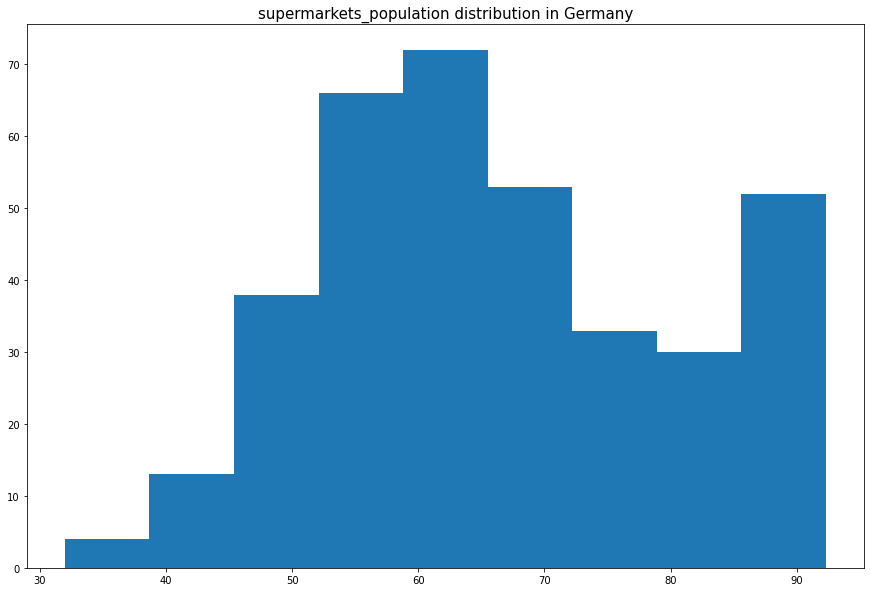

In [138]:
plot_histogram(df, 'supermarkets_population', 10)

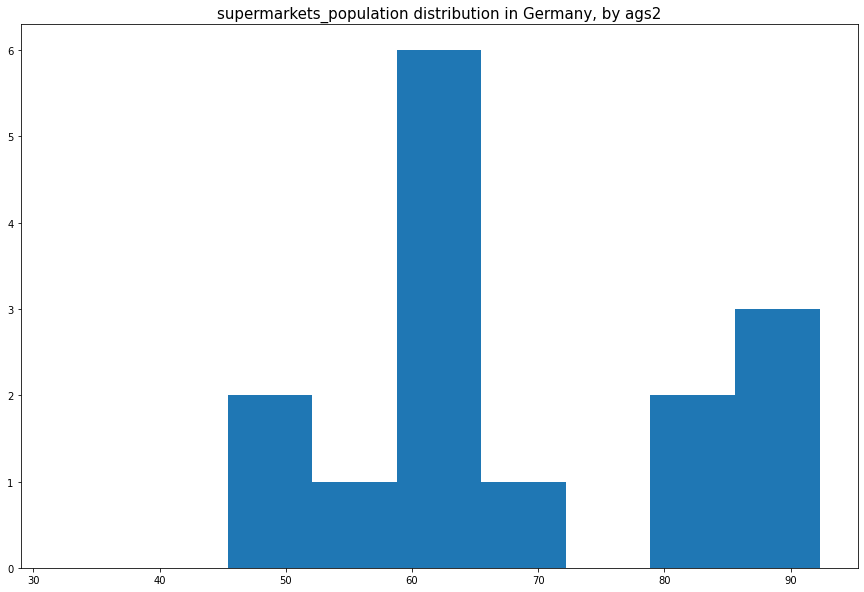

In [139]:
plot_histogram(df, 'supermarkets_population', 10, 'ags2', 1)

### regression

In [148]:
def plot_reg(df, x_col, y_col):
    sns.lmplot(x=x_col, y=y_col, data=df, scatter=True)
    plt.show()

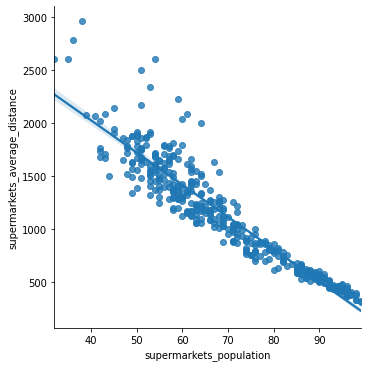

In [149]:
plot_reg(df, 'supermarkets_population', 'supermarkets_average_distance')